In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [52]:
networkpatterns = pd.read_csv('network_traffic_data_extended.csv')
networkpatterns.head(10)

,timestamp,bandwidth_in (kb),bandwidth_out (kb),jenis_probo,ping,label
0,2024-12-01 00:00:00,1924,509,ftp,28.23,Normal
1,2024-12-01 00:00:15,2386,1779,ftp,74.33,Normal
2,2024-12-01 00:01:10,1524,9774,http,4.15,Flood
3,2024-12-01 00:00:18,3682,3911,https,60.60,Normal
4,2024-12-01 00:02:24,3357,11831,ftp,70.43,Flood
5,2024-12-01 00:02:15,3711,7459,https,28.54,Normal
6,2024-12-01 00:05:36,206,2715,ftp,42.84,Normal
7,2024-12-01 00:02:06,2647,3627,dns,34.32,Normal
8,2024-12-01 00:00:48,6324,1684,icmp,84.90,Normal
9,2024-12-01 00:05:51,4433,811,ftp,46.48,Normal


In [53]:
networkpatterns.tail(10)

,timestamp,bandwidth_in (kb),bandwidth_out (kb),jenis_probo,ping,label
2240,2024-12-04 07:39:01,3214,5626,udp,53.29,Normal
2241,2024-12-09 09:09:39,8061,4565,tcp,72.32,Flood
2242,2024-12-06 11:56:24,8739,1426,tcp,30.43,Flood
2243,2024-12-04 00:24:38,6157,7604,https,60.55,Normal
2244,2024-12-08 06:06:30,3564,4470,tcp,97.16,Normal
2245,2024-12-08 11:25:23,1143,5729,http,72.25,Normal
2246,2024-12-06 02:40:45,7605,3694,icmp,92.27,Normal
2247,2024-12-09 17:03:00,9248,8723,udp,60.99,Flood
2248,2024-12-06 05:39:28,3296,2089,https,50.70,Normal
2249,2024-12-04 23:16:26,6275,7007,tcp,19.23,Normal


In [54]:
networkpatterns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           2250 non-null   object 
 1   bandwidth_in (kb)   2250 non-null   int64  
 2   bandwidth_out (kb)  2250 non-null   int64  
 3   jenis_probo         2250 non-null   object 
 4   ping                2250 non-null   float64
 5   label               2250 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 105.6+ KB


In [5]:
networkpatterns['label'] = networkpatterns['label'].map({'Normal': 0, 'Flood': 1}) 
networkpatterns

,timestamp,bandwidth_in (kb),bandwidth_out (kb),jenis_probo,ping,label
0,2024-12-01 00:00:00,1924,509,ftp,28.23,0
1,2024-12-01 00:00:15,2386,1779,ftp,74.33,0
2,2024-12-01 00:01:10,1524,9774,http,4.15,1
3,2024-12-01 00:00:18,3682,3911,https,60.60,0
4,2024-12-01 00:02:24,3357,11831,ftp,70.43,1
...,...,...,...,...,...,...
2245,2024-12-08 11:25:23,1143,5729,http,72.25,0
2246,2024-12-06 02:40:45,7605,3694,icmp,92.27,0
2247,2024-12-09 17:03:00,9248,8723,udp,60.99,1
2248,2024-12-06 05:39:28,3296,2089,https,50.70,0


In [55]:
x_networkpatterns = networkpatterns[['bandwidth_in (kb)', 'bandwidth_out (kb)', 'ping']]
y_networkpatterns = networkpatterns['label']

In [56]:
# === 2. Encode Label ===
y_label = networkpatterns['label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_label)  # Flood = 1, Normal = 0

In [57]:
# Splitting Dataset menjadi Data Training dan Data Testing
X_networkpatterns_train, X_networkpatterns_test, y_networkpatterns_train, y_networkpatterns_test = train_test_split(x_networkpatterns, y_networkpatterns, test_size=0.2, random_state=42, stratify=y_networkpatterns)

In [58]:
sc_networkpatterns = StandardScaler()
X_networkpatterns_train = sc_networkpatterns.fit_transform(X_networkpatterns_train)
X_networkpatterns_test = sc_networkpatterns.transform(X_networkpatterns_test)

In [59]:
print("Dataset yang digunakan untuk training sebanyak: ", X_networkpatterns_train.shape[0], "baris data")
print(pd.DataFrame(X_networkpatterns_train, columns= ['bandwidth_in (kb)', 'bandwidth_out (kb)', 'ping']))

Dataset yang digunakan untuk training sebanyak:  1800 baris data
      bandwidth_in (kb)  bandwidth_out (kb)      ping
0             -0.353944           -0.560888  1.551419
1             -1.108024           -1.398180  1.349528
2             -1.322397           -0.439377 -1.600088
3              0.130611            1.024912 -1.123910
4             -0.895293            0.472441 -0.767896
...                 ...                 ...       ...
1795           1.362681           -0.074520  1.561495
1796          -1.013477            1.794481 -1.566875
1797          -1.323382            0.832438  0.779682
1798           0.131924           -0.506775 -0.457410
1799          -1.694021            1.042409  1.006949

[1800 rows x 3 columns]


In [60]:
# Mencari nilai K yang optimal
ER_networkpatterns = []
k_range = range(1, 30)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_networkpatterns_train, y_networkpatterns_train)
    y_pred = knn.predict(X_networkpatterns_test)
    ER_networkpatterns.append(1 - accuracy_score(y_networkpatterns_test, y_pred))

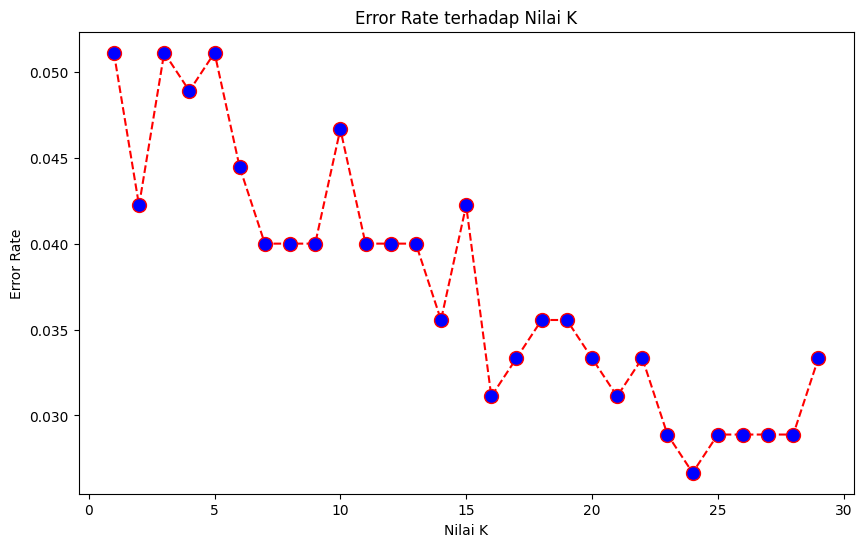

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, ER_networkpatterns, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Nilai K')
plt.ylabel('Error Rate')
plt.title('Error Rate terhadap Nilai K')
plt.show()

In [63]:
#Mencoba Prosedur Pelatihan Model dengan Algoritma KNN
k_optimal = 11
knn = KNeighborsClassifier(n_neighbors=k_optimal)
knn.fit(X_networkpatterns_train, y_networkpatterns_train)
y_networkpatterns_pred = knn.predict(X_networkpatterns_test)

In [65]:
#Pembuatan Prediksi dari Nilai K
pred_K11_networkpatterns = accuracy_score(y_networkpatterns_test, y_networkpatterns_pred)

In [66]:
#Melihat hasil prediksi dari nilai K 7
print(f'Akurasi dengan k = {k_optimal} : {pred_K11_networkpatterns * 100:.2f}%')

Akurasi dengan k = 11 : 96.00%


In [67]:
y_networkpatterns_test_array = np.array(y_networkpatterns_test)
y_pred_array = np.array(y_networkpatterns_pred)

In [68]:
print("Bentuk y_networkpatterns_test_array: ", y_networkpatterns_test_array.shape)
print("Bentuk y_pred_K7_array: ", y_networkpatterns_pred.shape)

Bentuk y_networkpatterns_test_array:  (450,)
Bentuk y_pred_K7_array:  (450,)


In [69]:
#Confusion Matrix K 1
print("Confusion Matrix K 11: ")
print(confusion_matrix(y_networkpatterns_test_array, y_networkpatterns_pred))

Confusion Matrix K 11: 
[[177  11]
 [  7 255]]


In [70]:
#Evaluasi Model dengan K = 1
print("\nClassification Report K 11: ")
print(classification_report(y_networkpatterns_test_array, y_networkpatterns_pred))


Classification Report K 11: 
              precision    recall  f1-score   support

       Flood       0.96      0.94      0.95       188
      Normal       0.96      0.97      0.97       262

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450

